2026-02-23 15:00:51.789201: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-02-23 15:00:51.799950: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-23 15:00:51.802845: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-23 15:00:51.810255: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1771837251.822821  178293 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1771837251.82

Epoch 1/1000


/home/silicon/dip_ai/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-02-23 15:00:54.224418: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 47156.6641 - mae: 154.2583 - val_loss: 133769.1094 - val_mae: 322.4247
Epoch 2/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 52091.7070 - mae: 164.1159 - val_loss: 117108.8906 - val_mae: 300.0898
Epoch 3/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35809.6680 - mae: 128.6338 - val_loss: 56380.7227 - val_mae: 199.1443
Epoch 4/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 15256.7617 - mae: 87.6639 - val_loss: 7170.8701 - val_mae: 71.0168
Epoch 5/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4718.2319 - mae: 61.5135 - val_loss: 7365.1562 - val_mae: 75.9198
Epoch 6/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4085.6169 - mae: 56.6657 - val_loss: 5715.4268 - val_mae: 65.8311
Epoch 7/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3874.1025 - mae: 56.3024 - val_loss: 6325.0869 - val_mae: 70.9764
Epoch 8/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3418.1677 - mae: 50.5594 - val_loss: 4895.7051 - val_mae

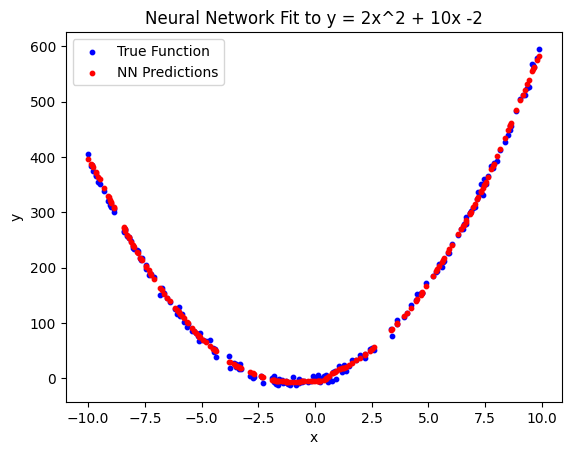

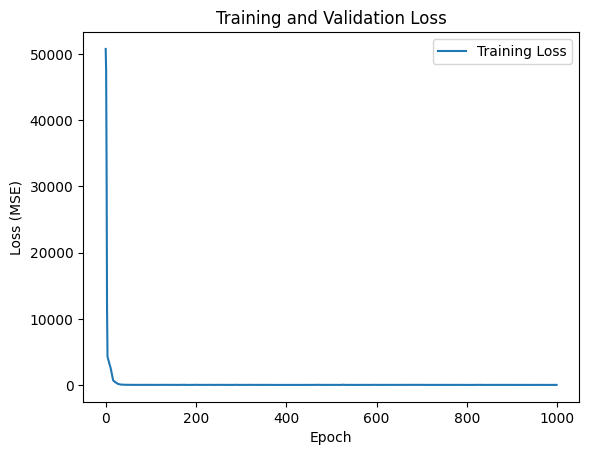

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense


# Define the model
model = Sequential([
  Dense(16,activation='relu',input_shape=(1,)),
  Dense(32,activation='relu'),
  Dense(64, activation='relu'),
  Dense(32, activation='relu'),
  Dense(16, activation='relu'),
  Dense(1, activation='linear')
])

# generate test and training data

def f(x):
    return 5 * x**2 + 10 * x - 2

x = np.linspace(-10, 10, 1000).reshape(-1, 1)
y = f(x) + np.random.randn(*x.shape) * 5 

# Shuffle the data
indices=np.random.permutation(len(x))
x=x[indices]
y=y[indices]

x_train, y_train = x[:800], y[:800]
x_test, y_test = x[800:], y[800:]



# Train the model
model.compile(optimizer='adam', loss='mse',metrics=['mae'])
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.01,verbose=1)

# evaluate model
loss, mae = model.evaluate(x_test, y_test, verbose=1)



# 6. Make Predictions
y_pred = model.predict(x_test)

# 7. Visualize Results
plt.scatter(x_test, y_test, label='True Function', color='blue', s=10)
plt.scatter(x_test, y_pred, label='NN Predictions', color='red', s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neural Network Fit to y = 2x^2 + 10x -2')
plt.legend()
plt.show()

# 8. Plot Training History
plt.plot(history.history['loss'], label='Training Loss')
# plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()
